# Figure Generation Code: planet_tile2img

In [107]:
import rasterio as rio
import os
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gp
import pandas as pd
import numpy as np

import xarray as xr
from rasterio.plot import show

from datetime import datetime
import csv

## Build Velocity Rastor Comparison Between S2 and PS

In [46]:
# Import Velocity Rastors
S2_raster_path = '/Volumes/SGlacier/SK_vmaps_2020_2021/velocity_20200904_20200914_100m_S2.tif'
PS_raster_path = '/Volumes/SGlacier/autorift_OUTPUT_PSsurge/velocity_20200906_20200912_100m_PS.tif'

#specify plot params
fs = 18
tickspacing = 50
y1 = 90; y2 = 360
x1 = 90; x2 = 360

#sentinel2
reader = rio.open(S2_raster_path);
S2r = reader.read(3);
imgres = reader.transform[0]
xdS2, ydS2 = S2r.shape
xS2_utms = np.arange(reader.bounds[0]+x1*imgres,reader.bounds[0]+x2*imgres,tickspacing*imgres).astype(int)/1000
yS2_utms = np.flip(np.arange(reader.bounds[1]+y1*imgres,reader.bounds[1]+y2*imgres,tickspacing*imgres).astype(int)/1000)

#planetscope
reader = rio.open(PS_raster_path); PSr = reader.read(3)
PSr = reader.read(3);
imgres = reader.transform[0]
xdPS, ydPS = PSr.shape
xPS_utms = np.arange(reader.bounds[0]+x1*imgres,reader.bounds[0]+x2*imgres,tickspacing*imgres).astype(int)/1000
yPS_utms = np.flip(np.arange(reader.bounds[1]+y1*imgres,reader.bounds[1]+y2*imgres,tickspacing*imgres).astype(int)/1000)

S2r_data = S2r.copy() # make a copy of the data
PSr_data = PSr.copy() # make a copy of the data
    
# Subtract The Rasters
difference_raster = S2r_data - PSr_data


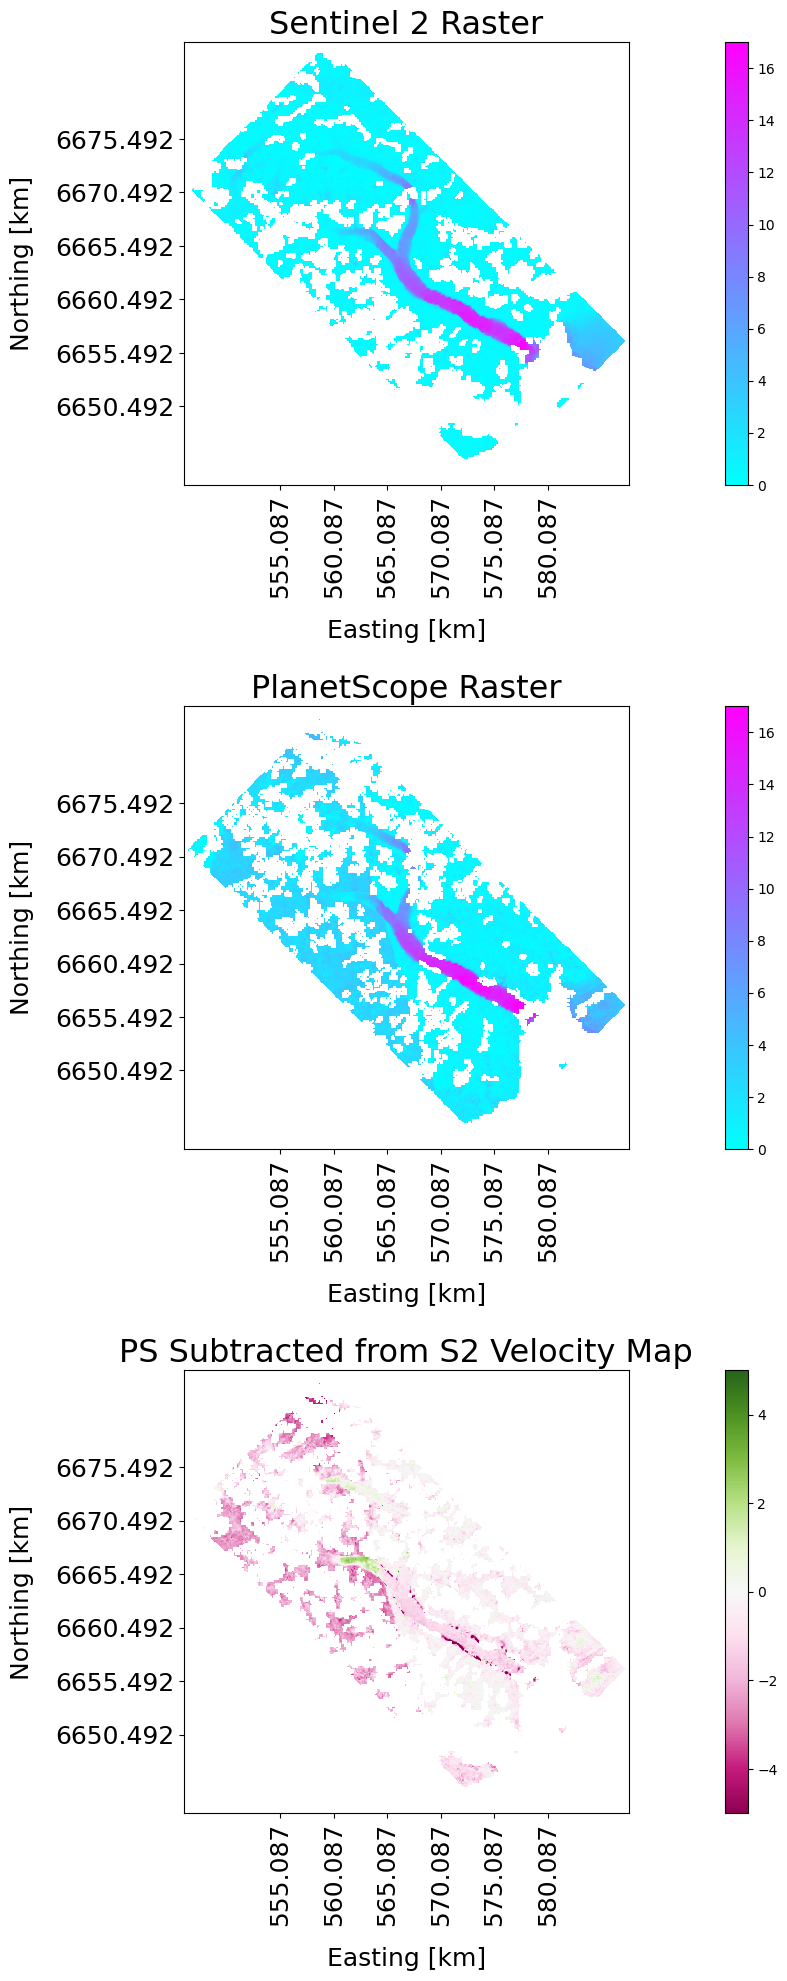

In [44]:
# Build Figures
#fig, ([ax1,ax2],[ax3,ax4]) = plt.subplots(2,2, figsize=(25, 23))
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(25, 23))

# Set the spacing between subplots
plt.subplots_adjust(hspace=0.5)

#sentinel 2
im1 = ax1.imshow(S2r/365, vmin=0, vmax=17, cmap='cool'); ax1.set_title('Sentinel 2 Raster', fontsize=fs+5); fig.colorbar(im1,ax=ax1)
# ticks and labels:
plt.sca(ax1)
plt.xticks(np.arange(x1,x2,tickspacing), labels = xS2_utms, rotation=90)
plt.yticks(np.arange(y1,y2,tickspacing), labels = yS2_utms)
plt.xlabel('Easting [km]',fontsize=fs, labelpad = 15); plt.ylabel('Northing [km]',fontsize=fs, labelpad = 15)
plt.tick_params(axis='both',labelsize=fs)

#planetscope
im2 = ax2.imshow(PSr/365, vmin=0, vmax=17, cmap='cool'); ax2.set_title('PlanetScope Raster', fontsize=fs+5); fig.colorbar(im2, ax=ax2)
# ticks and labels:
plt.sca(ax2)
plt.xticks(np.arange(x1,x2,tickspacing), labels = xPS_utms, rotation=90)
plt.yticks(np.arange(y1,y2,tickspacing), labels = yPS_utms)
plt.xlabel('Easting [km]',fontsize=fs, labelpad = 15); plt.ylabel('Northing [km]',fontsize=fs, labelpad = 15)
plt.tick_params(axis='both',labelsize=fs)

#difference raster
im3 = ax3.imshow(difference_raster/365,vmin=-5, vmax=5, cmap='PiYG'); ax3.set_title('PS Subtracted from S2 Velocity Map', fontsize=fs+5); fig.colorbar(im3,ax=ax3)
# ticks and labels:
plt.sca(ax3)
plt.xticks(np.arange(x1,x2,tickspacing), labels = xS2_utms, rotation=90)
plt.yticks(np.arange(y1,y2,tickspacing), labels = yS2_utms)
plt.xlabel('Easting [km]',fontsize=fs, labelpad = 15); plt.ylabel('Northing [km]',fontsize=fs, labelpad = 15)
plt.tick_params(axis='both',labelsize=fs)   

# Save the figure
plt.savefig('/Users/maddiegendreau/Desktop/test_plot.png', dpi=300)


## Build Velocity Rastor Comparison Between LS and PS

In [55]:
# Import Velocity Rastors
LS_raster_path = '/Volumes/SGlacier/SK_vmaps_2020_2021/velocity_20210215_20210312_300m_LS.tif'
PS_raster_path = '/Volumes/SGlacier/autorift_OUTPUT_PSsurge_SK/velocity_20210211_20210401_300m_PS.tif'

#specify plot params
fs = 18
tickspacing = 50
y1 = 90; y2 = 360
x1 = 90; x2 = 360

#sentinel2
reader = rio.open(LS_raster_path);
LSr = reader.read(2);
imgres = reader.transform[0]
xdLS, ydLS = LSr.shape
xLS_utms = np.arange(reader.bounds[0]+x1*imgres,reader.bounds[0]+x2*imgres,tickspacing*imgres).astype(int)/1000
yLS_utms = np.flip(np.arange(reader.bounds[1]+y1*imgres,reader.bounds[1]+y2*imgres,tickspacing*imgres).astype(int)/1000)

#planetscope
reader = rio.open(PS_raster_path); PSr = reader.read(3)
PSr = reader.read(3);
imgres = reader.transform[0]
xdPS, ydPS = PSr.shape
xPS_utms = np.arange(reader.bounds[0]+x1*imgres,reader.bounds[0]+x2*imgres,tickspacing*imgres).astype(int)/1000
yPS_utms = np.flip(np.arange(reader.bounds[1]+y1*imgres,reader.bounds[1]+y2*imgres,tickspacing*imgres).astype(int)/1000)

LSr_data = LSr.copy() # make a copy of the data
PSr_data = PSr.copy() # make a copy of the data
    
# Subtract The Rasters
difference_raster_2 = LSr_data - PSr_data


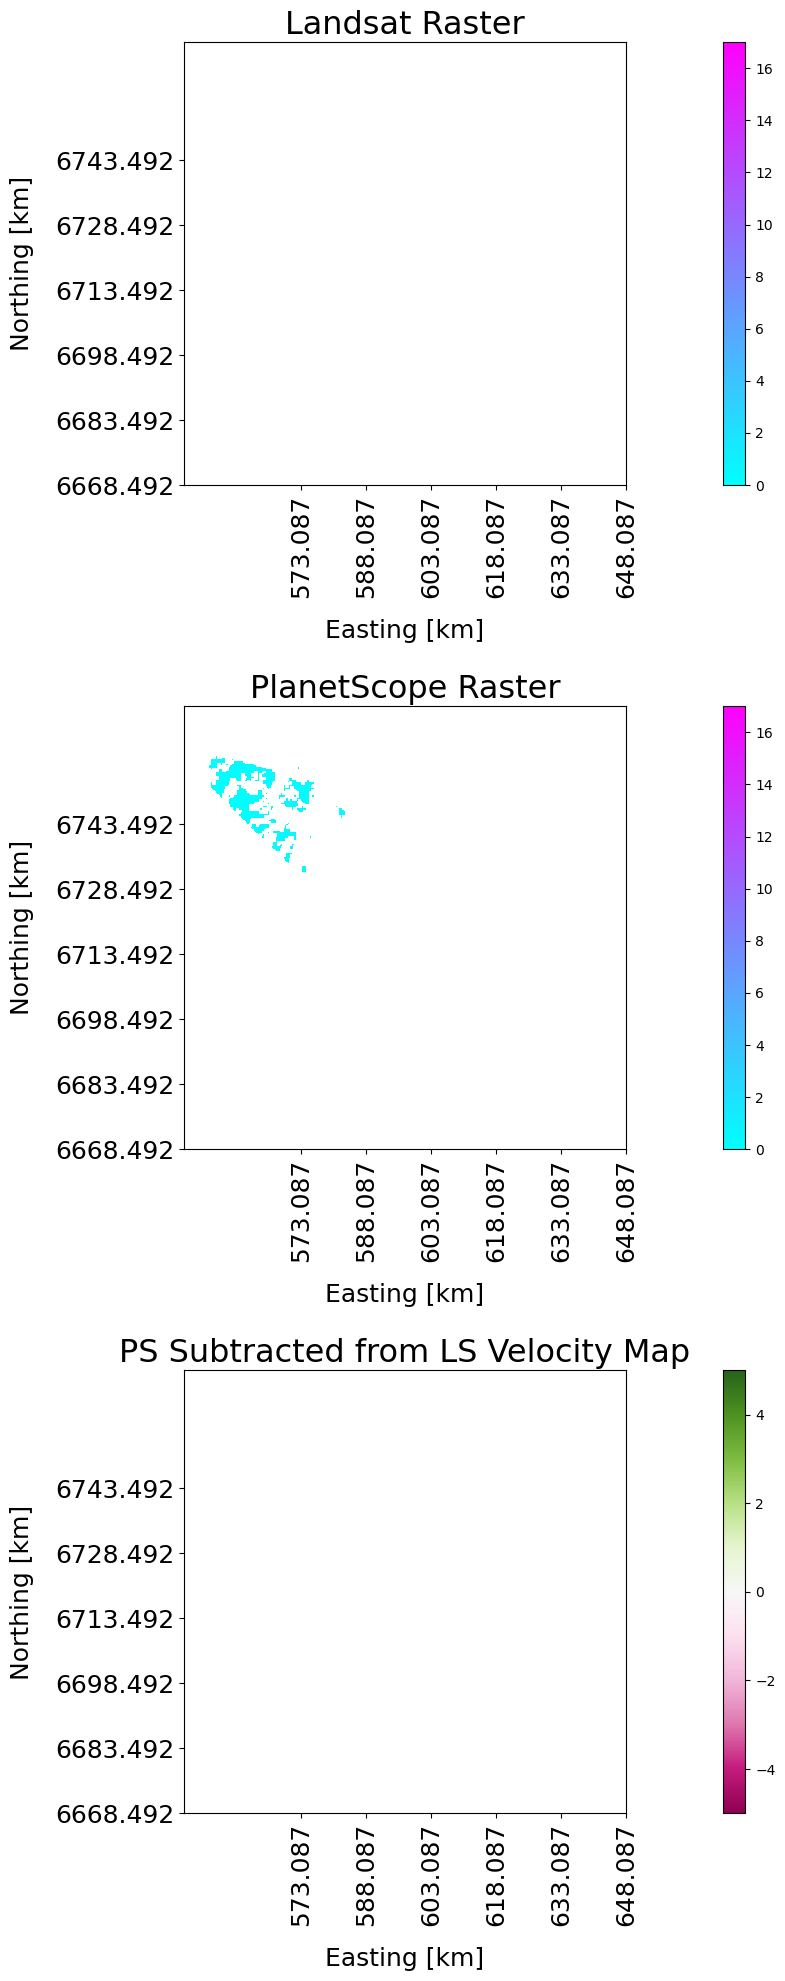

In [56]:
# Build Figures
#fig, ([ax1,ax2],[ax3,ax4]) = plt.subplots(2,2, figsize=(25, 23))
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(25, 23))

# Set the spacing between subplots
plt.subplots_adjust(hspace=0.5)

#sentinel 2
im1 = ax1.imshow(LSr/365, vmin=0, vmax=17, cmap='cool'); ax1.set_title('Landsat Raster', fontsize=fs+5); fig.colorbar(im1,ax=ax1)
# ticks and labels:
plt.sca(ax1)
plt.xticks(np.arange(x1,x2,tickspacing), labels = xLS_utms, rotation=90)
plt.yticks(np.arange(y1,y2,tickspacing), labels = yLS_utms)
plt.xlabel('Easting [km]',fontsize=fs, labelpad = 15); plt.ylabel('Northing [km]',fontsize=fs, labelpad = 15)
plt.tick_params(axis='both',labelsize=fs)

#planetscope
im2 = ax2.imshow(PSr/365, vmin=0, vmax=17, cmap='cool'); ax2.set_title('PlanetScope Raster', fontsize=fs+5); fig.colorbar(im2, ax=ax2)
# ticks and labels:
plt.sca(ax2)
plt.xticks(np.arange(x1,x2,tickspacing), labels = xPS_utms, rotation=90)
plt.yticks(np.arange(y1,y2,tickspacing), labels = yPS_utms)
plt.xlabel('Easting [km]',fontsize=fs, labelpad = 15); plt.ylabel('Northing [km]',fontsize=fs, labelpad = 15)
plt.tick_params(axis='both',labelsize=fs)

#difference raster
im3 = ax3.imshow(difference_raster_2/365,vmin=-5, vmax=5, cmap='PiYG'); ax3.set_title('PS Subtracted from LS Velocity Map', fontsize=fs+5); fig.colorbar(im3,ax=ax3)
# ticks and labels:
plt.sca(ax3)
plt.xticks(np.arange(x1,x2,tickspacing), labels = xLS_utms, rotation=90)
plt.yticks(np.arange(y1,y2,tickspacing), labels = yLS_utms)
plt.xlabel('Easting [km]',fontsize=fs, labelpad = 15); plt.ylabel('Northing [km]',fontsize=fs, labelpad = 15)
plt.tick_params(axis='both',labelsize=fs)   

# Save the figure
#plt.savefig('/Users/maddiegendreau/Desktop/test_plot.png', dpi=300)


## Generate Errors BoxPlot

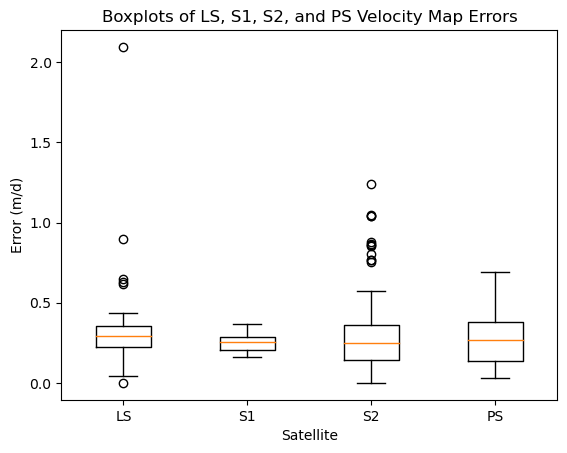

In [174]:
# Generate BoxPlot

data1 = pd.read_csv('/Users/maddiegendreau/Documents/CSVs/LS_Data.csv')['err_v']
data2 = pd.read_csv('/Users/maddiegendreau/Documents/CSVs/S1_Data.csv')['err_v']
data3 = pd.read_csv('/Users/maddiegendreau/Documents/CSVs/S2_Data.csv')['err_v']
data4 = pd.read_csv('/Users/maddiegendreau/Desktop/PS_Data.csv')['err_v']

data = [data1, data2, data3, data4]

positions = [1, 2, 3, 4]
labels = ['LS', 'S1', 'S2', 'PS']
plt.boxplot(data, positions=positions, labels=labels)

plt.xlabel('Satellite')
plt.ylabel('Error (m/d)')
plt.title('Boxplots of LS, S1, S2, and PS Velocity Map Errors')
plt.show()

## PlanetScope Histogram of Date Seperation

In [160]:
folder_path = '/Volumes/SGlacier/autorift_OUTPUT_PSsurge_SK/'

folder = os.listdir(folder_path)

prefix = "velocity"
suffix = "100m_PS.tif"

for file in folder:
    if file.startswith(prefix) and file.endswith(suffix):
        print(file)
        
        split_name_1 = file.split("_")[1]
        split_name_2 = file.split("_")[2]

        
        date_string1 = split_name_1
        date_string2 = split_name_2
      
        
        date1 = datetime.strptime(date_string1, '%Y%m%d')
        date2 = datetime.strptime(date_string2, '%Y%m%d')
       
        
        date_strings = date1, date2
        
        print(date_strings)
        
        # Calculate the time separation in days
        time_separation = (date2 - date1).days

        # Print the result
        print("Time separation in days:", time_separation)
        
        # Assuming you have the datetime object and the additional information
        dt = date1
        additional_info = time_separation
        
        print("dt",dt)
        print("add info", additional_info)
        
        # Specify the format for year and month
        format_str = "%Y-%m"

        # Save the data in a list
        data_row = [dt.strftime(format_str), str(additional_info)]
        
        print("date row", data_row)

        # Specify the CSV file path
        csv_file_path = "/Users/maddiegendreau/Desktop/date_output_PS.csv"

        # Write the data to the CSV file
        with open(csv_file_path, "a", newline="") as csvfile:
            writer = csv.writer(csvfile)
            #writer.writerow(["Date", "Date Separation"])  # Write the header row
            writer.writerow(data_row)  # Write the data row

        print("Data saved to the CSV file:", csv_file_path)

velocity_20211010_20211016_100m_PS.tif
(datetime.datetime(2021, 10, 10, 0, 0), datetime.datetime(2021, 10, 16, 0, 0))
Time separation in days: 6
dt 2021-10-10 00:00:00
add info 6
date row ['2021-10', '6']
Data saved to the CSV file: /Users/maddiegendreau/Desktop/date_output_PS.csv
velocity_20200627_20200805_100m_PS.tif
(datetime.datetime(2020, 6, 27, 0, 0), datetime.datetime(2020, 8, 5, 0, 0))
Time separation in days: 39
dt 2020-06-27 00:00:00
add info 39
date row ['2020-06', '39']
Data saved to the CSV file: /Users/maddiegendreau/Desktop/date_output_PS.csv
velocity_20210617_20210629_100m_PS.tif
(datetime.datetime(2021, 6, 17, 0, 0), datetime.datetime(2021, 6, 29, 0, 0))
Time separation in days: 12
dt 2021-06-17 00:00:00
add info 12
date row ['2021-06', '12']
Data saved to the CSV file: /Users/maddiegendreau/Desktop/date_output_PS.csv
velocity_20200329_20200411_100m_PS.tif
(datetime.datetime(2020, 3, 29, 0, 0), datetime.datetime(2020, 4, 11, 0, 0))
Time separation in days: 13
dt 2020-0

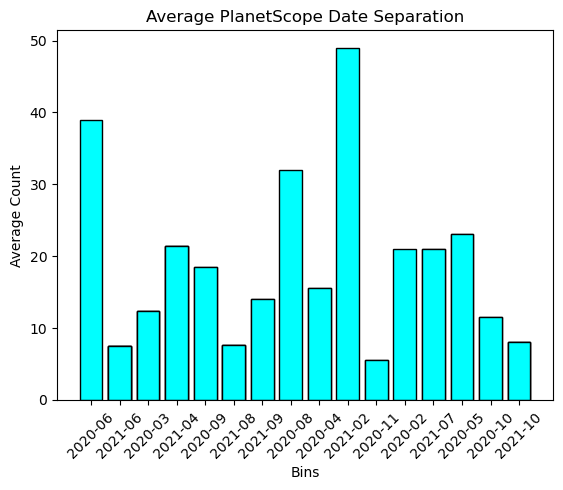

In [162]:
# Read the CSV file into a DataFrame
data = pd.read_csv('/Users/maddiegendreau/Desktop/date_output_PS.csv')

# Extract the data from the first and second columns
bins = data.iloc[:, 0]
counts = data.iloc[:, 1]

# Set the bin labels
bin_labels = bins.astype(str)

# Create an empty dictionary to store the averaged counts
averages = {}

# Iterate over each bin
for bin_value, count in zip(bins, counts):
    bin_value = str(bin_value)
    if bin_value in averages:
        # If the bin already exists in the dictionary, update the count and number of occurrences
        averages[bin_value]['count'] += count
        averages[bin_value]['occurrences'] += 1
    else:
        # If the bin doesn't exist in the dictionary, initialize it with the count and occurrences
        averages[bin_value] = {'count': count, 'occurrences': 1}

# Calculate the average count for each bin
bin_averages = [averages[bin_value]['count'] / averages[bin_value]['occurrences'] for bin_value in bin_labels]

# Create a histogram with averaged counts
plt.bar(bin_labels, bin_averages, color ='cyan', edgecolor='black')

# Customize the plot
plt.xlabel('Bins')
plt.ylabel('Average Count')
plt.title('Average PlanetScope Date Separation')

# Rotate the x-axis labels if needed
plt.xticks(rotation=45)

# Display the histogram
plt.show()

#plt.savefig('figure.png')

## Landsat and Sentinel Histogram of Date Separation

In [172]:
folder_path = '/Volumes/SGlacier/SK_vmaps_2020_2021/'

folder = os.listdir(folder_path)

prefix = "velocity"
suffix = ("100m_S2.tif","100m_S1.tif","100m_LS.tif")

for file in folder:
    if file.startswith(prefix) and file.endswith(suffix):
        print(file)
        
        split_name_1 = file.split("_")[1]
        split_name_2 = file.split("_")[2]

        
        date_string1 = split_name_1
        date_string2 = split_name_2
      
        
        date1 = datetime.strptime(date_string1, '%Y%m%d')
        date2 = datetime.strptime(date_string2, '%Y%m%d')
        date_strings = date1, date2
        
        
        # Calculate the time separation in days
        time_separation = (date2 - date1).days

        # Print the result
        print("Time separation in days:", time_separation)
        
        # Assuming you have the datetime object and the additional information
        dt = date1
        additional_info = time_separation
        
        # Specify the format for year and month
        format_str = "%Y-%m"

        # Save the data in a list
        data_row = [dt.strftime(format_str), str(additional_info)]

        # Specify the CSV file path
        csv_file_path = "/Users/maddiegendreau/Desktop/date_output_S1_S2_LS.csv"

        # Write the data to the CSV file
        with open(csv_file_path, "a", newline="") as csvfile:
            writer = csv.writer(csvfile)
            #writer.writerow(["Date", "Date Separation"])  # Write the header row
            writer.writerow(data_row)  # Write the data row

        print("Data saved to the CSV file:", csv_file_path)

velocity_20200914_20200924_100m_S2.tif
Time separation in days: 10
Data saved to the CSV file: /Users/maddiegendreau/Desktop/date_output_S1_S2_LS.csv
velocity_20200904_20200914_100m_S2.tif
Time separation in days: 10
Data saved to the CSV file: /Users/maddiegendreau/Desktop/date_output_S1_S2_LS.csv
velocity_20210104_20210116_100m_S1.tif
Time separation in days: 12
Data saved to the CSV file: /Users/maddiegendreau/Desktop/date_output_S1_S2_LS.csv
velocity_20200924_20201017_100m_S2.tif
Time separation in days: 23
Data saved to the CSV file: /Users/maddiegendreau/Desktop/date_output_S1_S2_LS.csv
velocity_20200818_20200904_100m_S2.tif
Time separation in days: 17
Data saved to the CSV file: /Users/maddiegendreau/Desktop/date_output_S1_S2_LS.csv
velocity_20210204_20210211_100m_S2.tif
Time separation in days: 7
Data saved to the CSV file: /Users/maddiegendreau/Desktop/date_output_S1_S2_LS.csv
velocity_20210211_20210402_100m_S2.tif
Time separation in days: 50
Data saved to the CSV file: /Users

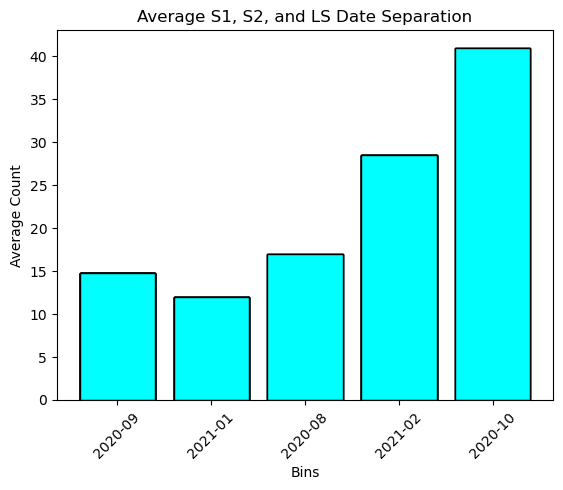

In [174]:
# Read the CSV file into a DataFrame
data = pd.read_csv('/Users/maddiegendreau/Desktop/date_output_S1_S2_LS.csv')

# Extract the data from the first and second columns
bins = data.iloc[:, 0]
counts = data.iloc[:, 1]

# Set the bin labels
bin_labels = bins.astype(str)

# Create an empty dictionary to store the averaged counts
averages = {}

# Iterate over each bin
for bin_value, count in zip(bins, counts):
    bin_value = str(bin_value)
    if bin_value in averages:
        # If the bin already exists in the dictionary, update the count and number of occurrences
        averages[bin_value]['count'] += count
        averages[bin_value]['occurrences'] += 1
    else:
        # If the bin doesn't exist in the dictionary, initialize it with the count and occurrences
        averages[bin_value] = {'count': count, 'occurrences': 1}

# Calculate the average count for each bin
bin_averages = [averages[bin_value]['count'] / averages[bin_value]['occurrences'] for bin_value in bin_labels]

# Create a histogram with averaged counts
plt.bar(bin_labels, bin_averages, color ='cyan', edgecolor='black')

# Customize the plot
plt.xlabel('Bins')
plt.ylabel('Average Count')
plt.title('Average S1, S2, and LS Date Separation')

# Rotate the x-axis labels if needed
plt.xticks(rotation=45)

# Display the histogram
plt.show()

#plt.savefig('figure.png')

## Test

In [49]:
#Import Velocity Rastors
LS_raster_path = '/Volumes/SGlacier/SK_vmaps_2020_2021/velocity_20201010_20201120_100m_LS.tif'
PS_raster_path = '/Volumes/SGlacier/autorift_OUTPUT_PSsurge/velocity_20201013_20201022_100m_PS.tif'

#specify plot params
fs = 18
tickspacing = 50
y1 = 90; y2 = 360
x1 = 90; x2 = 360

#sentinel2
reader = rio.open(LS_raster_path);
LSr = reader.read(3);
imgres = reader.transform[0]
xdLS, ydLS = LSr.shape
xLS_utms = np.arange(reader.bounds[0]+x1*imgres,reader.bounds[0]+x2*imgres,tickspacing*imgres).astype(int)/1000
yLS_utms = np.flip(np.arange(reader.bounds[1]+y1*imgres,reader.bounds[1]+y2*imgres,tickspacing*imgres).astype(int)/1000)

#planetscope
reader = rio.open(PS_raster_path); PSr = reader.read(3)
PSr = reader.read(3);
imgres = reader.transform[0]
xdPS, ydPS = PSr.shape
xPS_utms = np.arange(reader.bounds[0]+x1*imgres,reader.bounds[0]+x2*imgres,tickspacing*imgres).astype(int)/1000
yPS_utms = np.flip(np.arange(reader.bounds[1]+y1*imgres,reader.bounds[1]+y2*imgres,tickspacing*imgres).astype(int)/1000)

LSr_data = LSr.copy() # make a copy of the data
PSr_data = PSr.copy() # make a copy of the data
    
# Subtract The Rasters
difference_raster = LSr_data - PSr_data

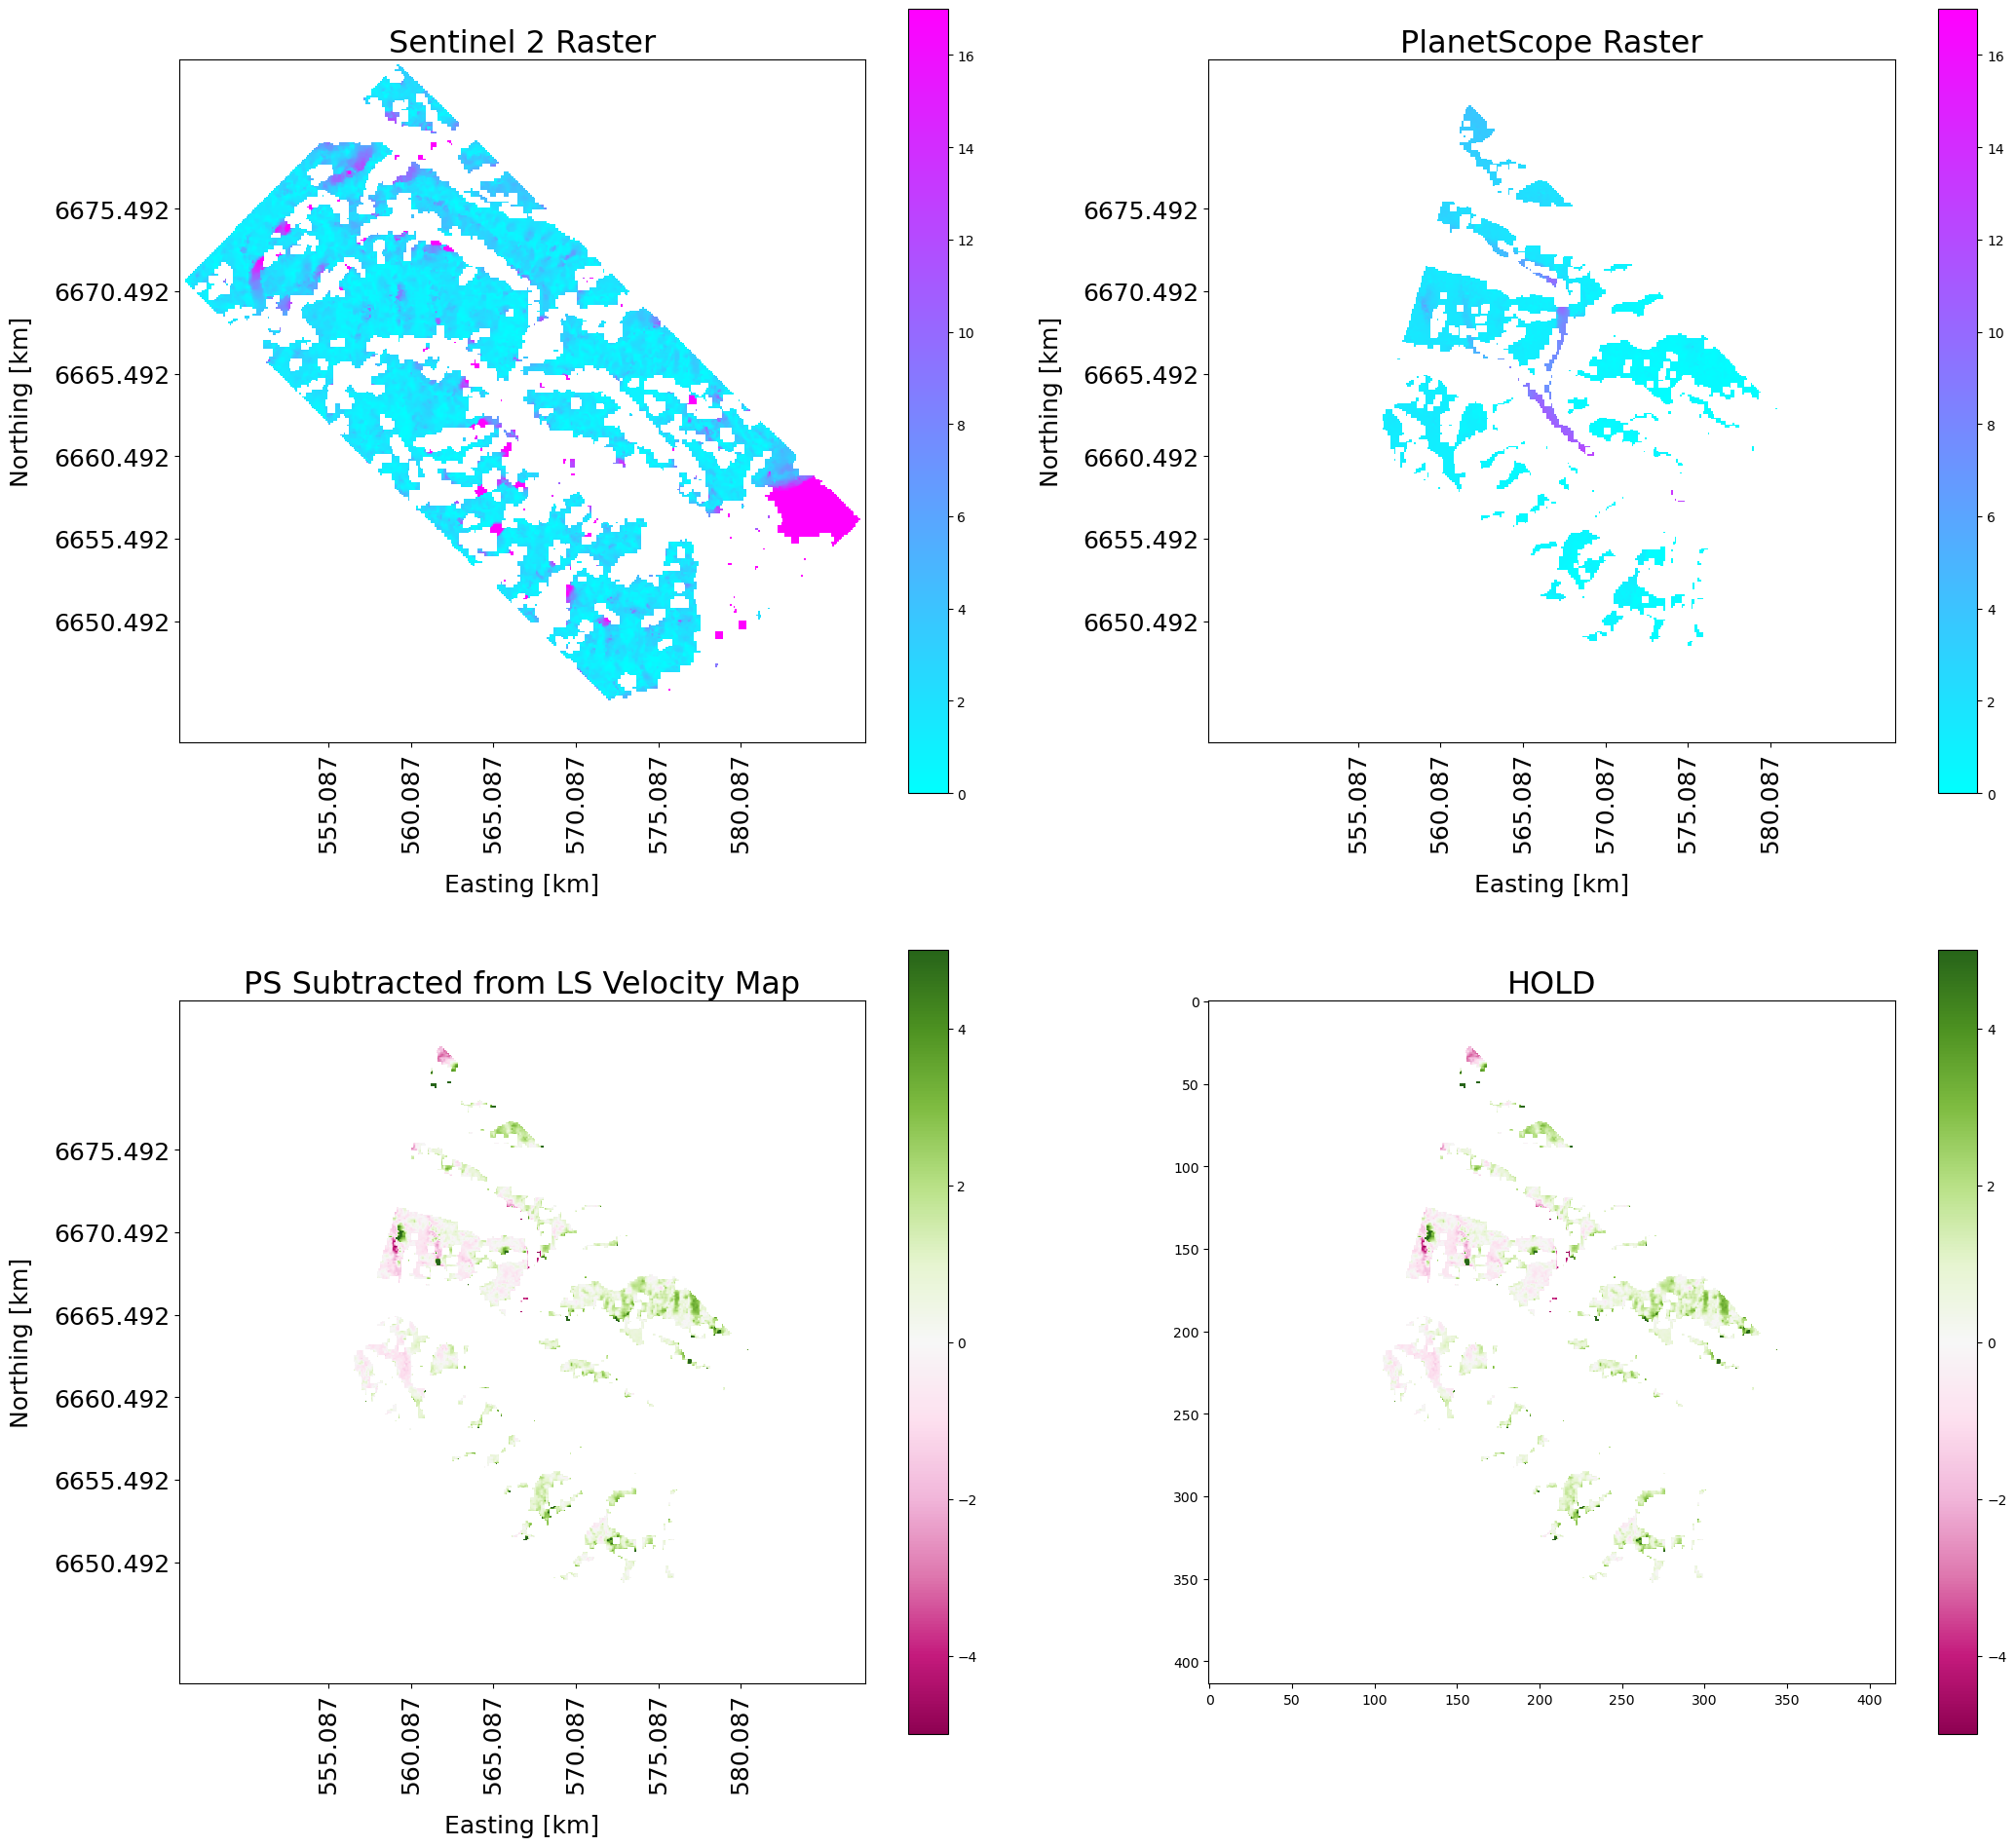

In [50]:
# Build Figures
fig, ([ax1,ax2],[ax3,ax4]) = plt.subplots(2,2, figsize=(25, 23))

#sentinel 2
im1 = ax1.imshow(LSr/365, vmin=0, vmax=17, cmap='cool'); ax1.set_title('Sentinel 2 Raster', fontsize=fs+5); fig.colorbar(im1,ax=ax1)
# ticks and labels:
plt.sca(ax1)
plt.xticks(np.arange(x1,x2,tickspacing), labels = xLS_utms, rotation=90)
plt.yticks(np.arange(y1,y2,tickspacing), labels = yLS_utms)
plt.xlabel('Easting [km]',fontsize=fs, labelpad = 15); plt.ylabel('Northing [km]',fontsize=fs, labelpad = 15)
plt.tick_params(axis='both',labelsize=fs)

#planetscope
im2 = ax2.imshow(PSr/365, vmin=0, vmax=17, cmap='cool'); ax2.set_title('PlanetScope Raster', fontsize=fs+5); fig.colorbar(im2, ax=ax2)
# ticks and labels:
plt.sca(ax2)
plt.xticks(np.arange(x1,x2,tickspacing), labels = xPS_utms, rotation=90)
plt.yticks(np.arange(y1,y2,tickspacing), labels = yPS_utms)
plt.xlabel('Easting [km]',fontsize=fs, labelpad = 15); plt.ylabel('Northing [km]',fontsize=fs, labelpad = 15)
plt.tick_params(axis='both',labelsize=fs)

#difference raster
im3 = ax3.imshow(difference_raster/365,vmin=-5, vmax=5, cmap='PiYG'); ax3.set_title('PS Subtracted from LS Velocity Map', fontsize=fs+5); fig.colorbar(im3,ax=ax3)
# ticks and labels:
plt.sca(ax3)
plt.xticks(np.arange(x1,x2,tickspacing), labels = xLS_utms, rotation=90)
plt.yticks(np.arange(y1,y2,tickspacing), labels = yLS_utms)
plt.xlabel('Easting [km]',fontsize=fs, labelpad = 15); plt.ylabel('Northing [km]',fontsize=fs, labelpad = 15)
plt.tick_params(axis='both',labelsize=fs)

# Hold Space
im4 = ax4.imshow(difference_raster/365,vmin=-5, vmax=5, cmap='PiYG'); ax4.set_title('HOLD', fontsize=fs+5); fig.colorbar(im4,ax=ax4)
plt.show()                
                            